In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_habits_performance.csv") 
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

print("\nColumn names:")
print(df.columns)

print(df)

print("\nData types:")
print(df[['sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'exam_score']].dtypes)


First few rows of the dataset:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6             

Data Description: 
Name: Units: Meaning
1. Sleep Hours:  hours/night
    - average sleep per night in range of 0-12
2. Exercise Frequency: Times per week
    - how many times one workouts in a week
3. Parental Education: Catergorical in HS, BS, MS
    -  Highest education of either parent
4. Exam Score: points (0-100)
    - Final exam score in the course
    

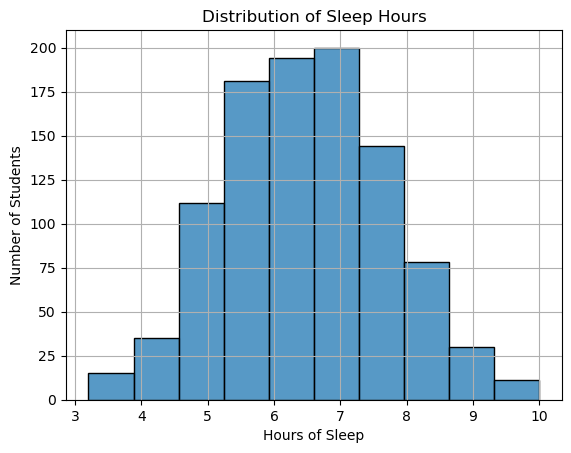

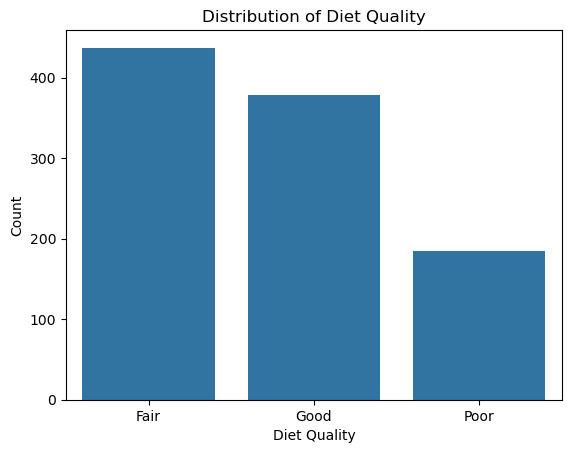

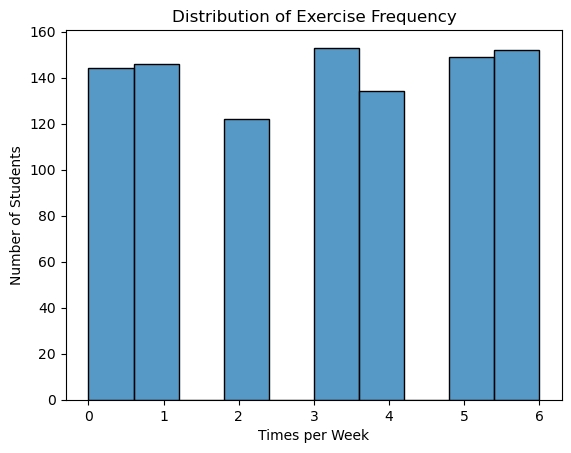

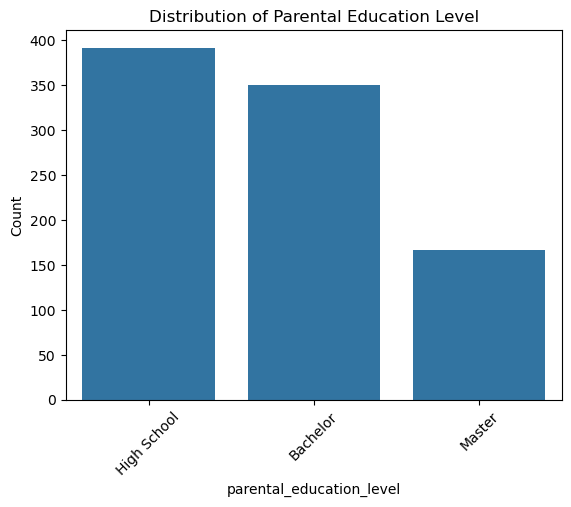

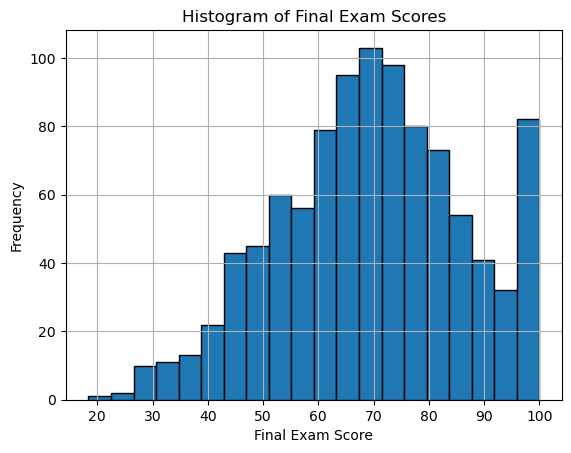

In [3]:
# EDA
from pandas import CategoricalDtype


sns.histplot(df['sleep_hours'], bins=10, kde=False, edgecolor='black')
plt.title("Distribution of Sleep Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

# Bar plot of diet_quality
sns.countplot(data=df, x='diet_quality', order=df['diet_quality'].value_counts().index)
plt.title("Distribution of Diet Quality")
plt.xlabel("Diet Quality")
plt.ylabel("Count")
plt.show()


 # Histogram of exercise_frequency
sns.histplot(df['exercise_frequency'], bins=10, kde=False)
plt.title("Distribution of Exercise Frequency")
plt.xlabel("Times per Week")
plt.ylabel("Number of Students")
plt.show()


# Bar plot of parental_education_level
edu_order = ["High School", "Bachelor", "Master"]
cat_type = CategoricalDtype(categories=edu_order, ordered=True)
df['parental_education_level'] = df['parental_education_level'].astype(cat_type)

# Now countplot will draw a 0‑height bar for missing groups
sns.countplot(x='parental_education_level', data=df, order=edu_order)
plt.xticks(rotation=45)
plt.title("Distribution of Parental Education Level")
plt.ylabel("Count")
plt.show()

#  histogram (Target Variable) 
df['exam_score'].hist(bins=20, edgecolor='black')
plt.title("Histogram of Final Exam Scores")
plt.xlabel("Final Exam Score")
plt.ylabel("Frequency")
plt.show()



In [4]:
from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import CategoricalDtype

# Define order with 'Unknown'
edu_order = ['Unknown', 'High School', 'Bachelor', 'Master']
diet_order = ['Unknown', 'Poor', 'Fair', 'Good']

# Update column to be Categorical with the full list first
cat_type = CategoricalDtype(categories=edu_order, ordered=True)
df['parental_education_level'] = df['parental_education_level'].astype(cat_type)
cat_type_diet = CategoricalDtype(categories=diet_order, ordered=True)
df['diet_quality'] = df['diet_quality'].astype(cat_type_diet)

# Now safely fill NaN with 'Unknown'
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')
df['diet_quality'] = df['diet_quality'].fillna('Unknown')

# Encode using OrdinalEncoder
edu_encoder = OrdinalEncoder(categories=[edu_order])
df['parental_education_encoded'] = edu_encoder.fit_transform(df[['parental_education_level']])
diet_encoder = OrdinalEncoder(categories=[diet_order])
df['diet_quality_encoded'] = diet_encoder.fit_transform(df[['diet_quality']])

EDA: 
1. Sleep hours
- Bell Shaped with center around 6.5 and 7 hours
- !0 hours show extreme sleepers
2. Exercise Freq
- Seem Fair and uniform across
3. Diet Quality
- Class imbalance
_ Fair is greater than good which is greater than poor
4. Parental Education Level
- HS > Bachelors > Masters
5. Exam Score: 
- Slightly right skewed



Analyzing attribute: sleep_hours
Minimum: 3.05
Q1: 5.60, Q2 (median): 6.50, Q3: 7.30
Maximum: 9.85
IQR: 1.70
Number of Outliers: 2
Outlier Values: [10. 10.]


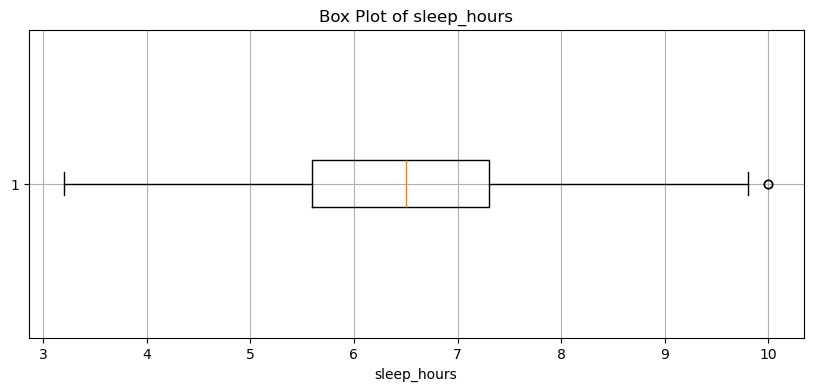


Analyzing attribute: parental_education_encoded
Minimum: -0.50
Q1: 1.00, Q2 (median): 2.00, Q3: 2.00
Maximum: 3.50
IQR: 1.00
Number of Outliers: 0


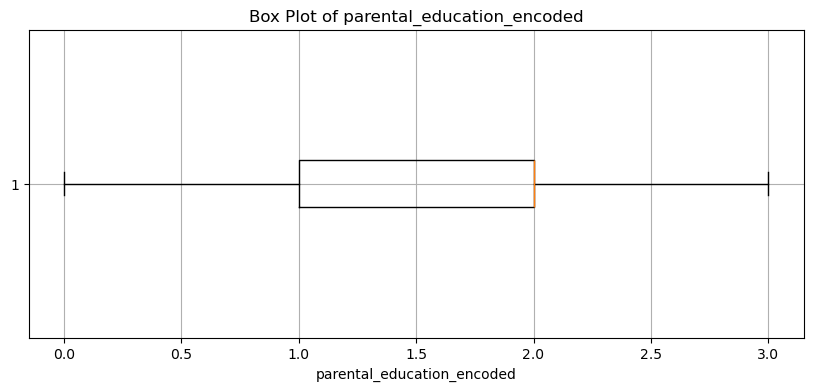


Analyzing attribute: diet_quality_encoded
Minimum: 0.50
Q1: 2.00, Q2 (median): 2.00, Q3: 3.00
Maximum: 4.50
IQR: 1.00
Number of Outliers: 0


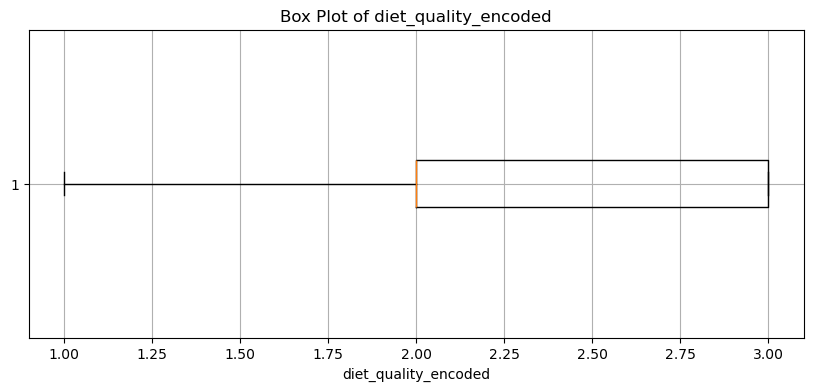


Analyzing attribute: exercise_frequency
Minimum: -5.00
Q1: 1.00, Q2 (median): 3.00, Q3: 5.00
Maximum: 11.00
IQR: 4.00
Number of Outliers: 0


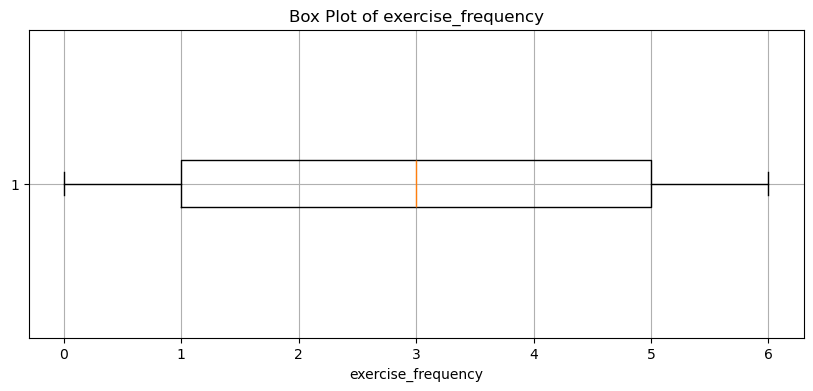

In [5]:

# List of attributes to analyze
attributes = ['sleep_hours', 'parental_education_encoded','diet_quality_encoded', 'exercise_frequency']

for attr in attributes:
    print(f"\nAnalyzing attribute: {attr}")
    data = df[attr].dropna()  # remove missing values if any

    # Calculate quartiles and IQR
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # Tukey fences
    min_value = q1 - 1.5 * iqr
    max_value = q3 + 1.5 * iqr

    # Identify outliers
    outliers = data[(data < min_value) | (data > max_value)]

    # Print statistics
    print(f"Minimum: {min_value:.2f}")
    print(f"Q1: {q1:.2f}, Q2 (median): {q2:.2f}, Q3: {q3:.2f}")
    print(f"Maximum: {max_value:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outlier Values: {outliers.values}")

    # Plot horizontal boxplot
    plt.figure(figsize=(10, 4))
    plt.boxplot(data, vert=False)
    plt.title(f'Box Plot of {attr}')
    plt.xlabel(attr)
    plt.grid(True)
    plt.show()

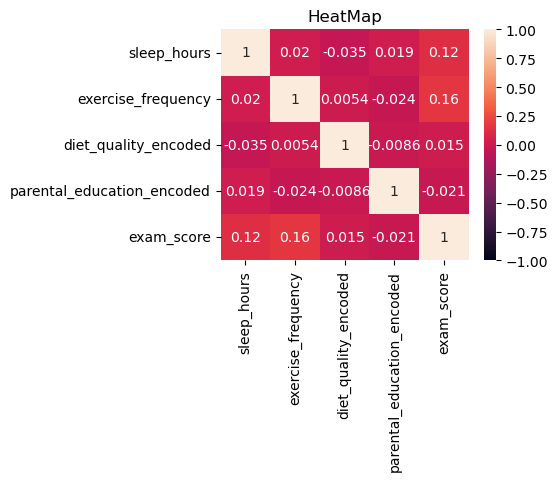

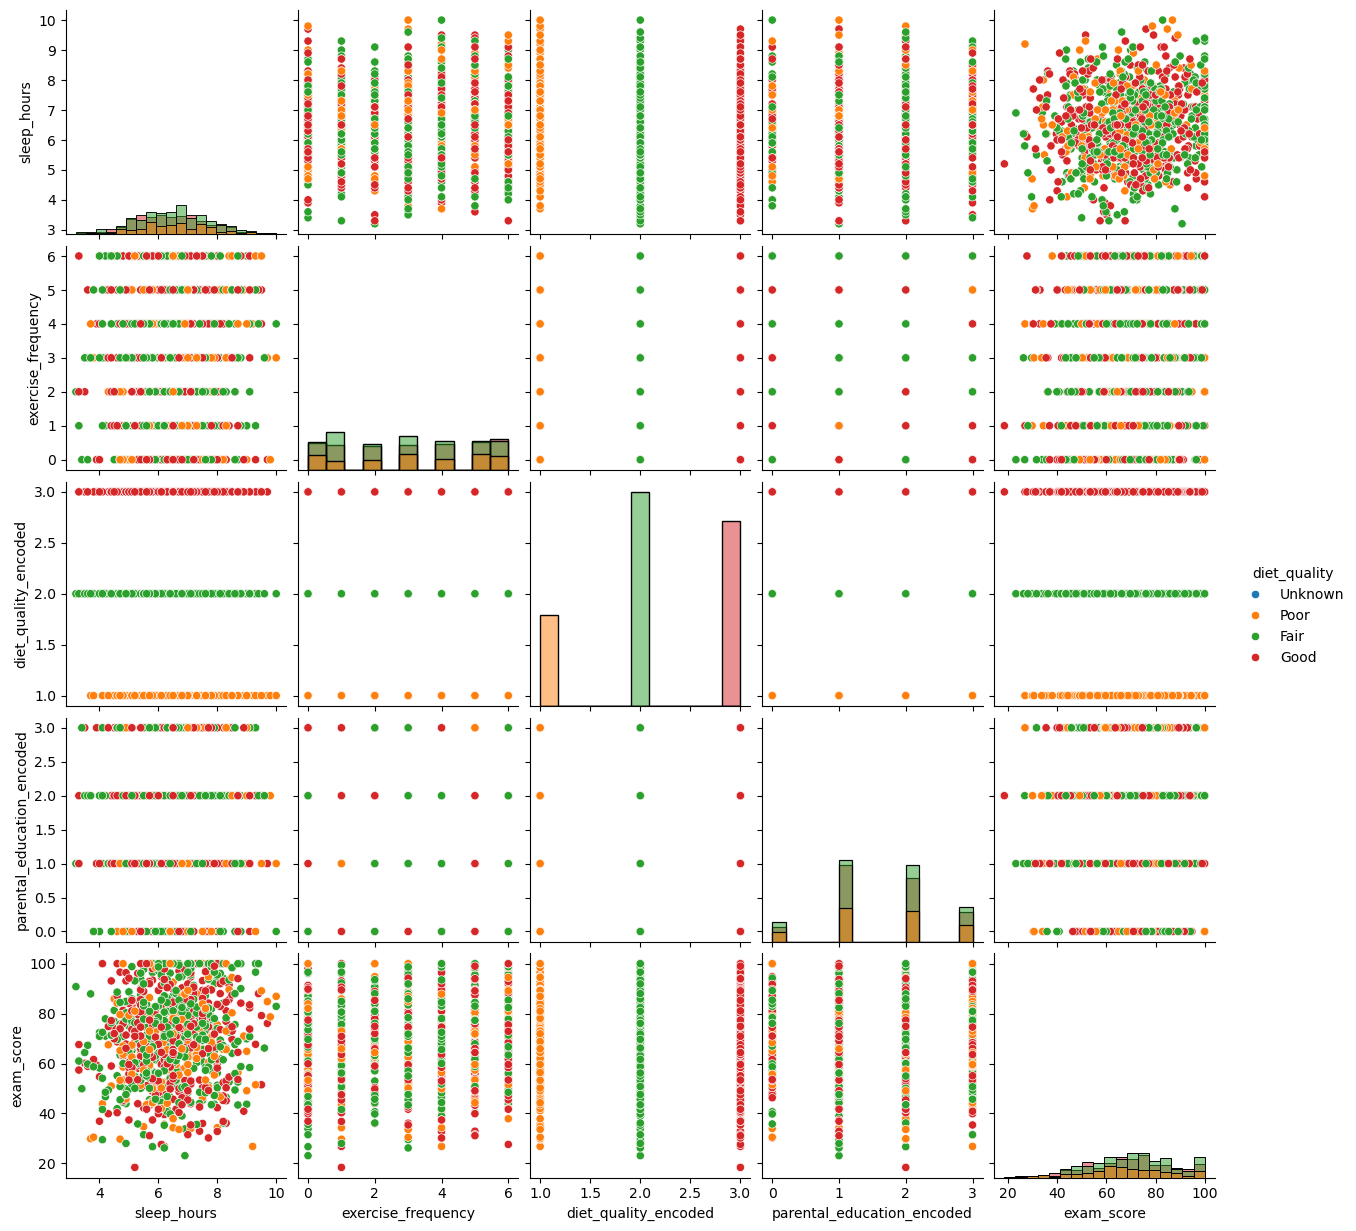

In [6]:
# Correlation (numeric only)
plt.figure(figsize=(4,3))
sns.heatmap(df[['sleep_hours', 
    'exercise_frequency', 
    'diet_quality_encoded', 
    'parental_education_encoded', 
    'exam_score']].corr(),
            annot=True, vmin=-1, vmax=1); plt.title("HeatMap");

# Scatter matrix
sns.pairplot(df, vars=['sleep_hours',
    'exercise_frequency',
    'diet_quality_encoded',
    'parental_education_encoded',
    'exam_score'],
             hue='diet_quality', diag_kind='hist');


Outliers: 
1. Sleep Hours: 2 outliers---> They are plausible and descirbe long sleepers, potentially remove
2. Exercise Freq: 0 outliers
3. Parental: 0 outliers
4. Diet: 0 outliers


Interperation: All features are clean and fall within limits of human capacity 


Correlation Heat Map: 
Sleep and Exam Score : Weak
Exercise freq and Exam Score: Weak
Parental : Weak
Diet: Weak
Sleep and Exercise: are otherwise explained by the literature review



https://www.sciencedirect.com/science/article/pii/S0022395612002786?casa_token=AmEw6Iwp9fQAAAAA:CnBmIiCwZmqqSFoY60ORGc8JNwNL7-6prLwXmThuJ4qeSgIWh9Jz6Tft3cnco9wMj1rSjJunM00

This 2012 study by Ahrberg et al. found that poor sleep quality and elevated stress levels immediately before exams significantly correlated with lower academic performance in medical students. Over half (59%) experienced clinically significant sleep disturbances (PSQI > 5).

https://pmc.ncbi.nlm.nih.gov/articles/PMC5609663/

--> Takes on sleep hours and exercise - 2 features
--> Supports Exercise


This article explained thier reserach investigated which is the impact of an on-campus physical activity intervention called Fitness4Finals (F4F) on students’ stress levels during final exam periods at the University of Nevada, Las Vegas.  Although quantitative results did not show statistically significant reductions in cortisol or PPS (p = .864), qualitative responses revealed that 100% of the participants in the F4F group perceived stress relief. This showed the importance of including lifestyle variables—such as exercise frequency and sleep hours—when predicting academic performance.




https://onlinelibrary.wiley.com/doi/abs/10.1111/jhn.12632?casa_token=LPea3zckB7EAAAAA%3AiNAN8FpbQquU9RPqKMcnR95LDcm9nHTUymK8AxdYIH4YHbiWWMaj5YQGenqYr1h_SwMUTmpoe8t9XSXH


This article resrach conducted a cross-sectional study at the University of Newcastle in Australia to investigate the relationship between diet quality and academic performance among university students. Academic performance was self-reported as GPA. After controlling for socio-demographic and student characteristics, the results showed that higher GPA was significantly associated with higher overall diet quality (β = 0.02, p = 0.011), higher intake of fruits and vegetables, and lower intake of sweetened drinks and other EDNP foods. Effects were noted to be small. This study supports the inclusion of diet quality as a key behavioral predictor in models of student academic performance . 



https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=ce368197b1724402ef241ddeb2c4eac5fedcb88f
--> this is more needed for parental education level but income is also a factor 
--> postive correlated

This reserach examined the influence of parental education and socio-economic status (SES) on the academic achievement of Master’s level students at the University of Sargodha, Pakistan. Study found significant associations between higher parental education levels and student GPA, with both mother’s and father’s educational attainment positively correlated with academic performance. This research supports the inclusion of parental education and income as important features in predictive models of student performance.



# Model Chosen : Random Forest


Assigned Features:

1. Sleep Hours

2. Diet Quality

3. Exercise Frequency

Model:

Random Forest Regressor (for predicting continuous target: exam score)



##One:  Feature Engineering of all features + Preprocessing

Current features of mine: 

Sleep Hours: Keep as it currently is, but we can normalize using StandardScaler

Diet Quality: Ordinal encode (Poor = 0, Fair = 1, Good = 2) done above 

Exercise Frequency: Integer, already checked for outliers and skew, so normalize



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Feature Engineering & Scaling
# Define features and target
features = ['study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'sleep_hours',
    'diet_quality',  
    'exercise_frequency',
    'mental_health_rating']

target = 'exam_score'

X = df[
    ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage',
     'sleep_hours', 'diet_quality_encoded', 'exercise_frequency', 'mental_health_rating']
]
y = df['exam_score']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Hyperparameter Tuning: GridSearchCV
# Define hyperparameter grid to tune Random Forest
# This is for hyperparameter tuning (finding the best combination of n_estimators, max_depth, etc.)

param_grid = {
    'n_estimators': [100, 200], # Number of trees
    'max_depth': [10, 15, None],  # Tree depth
    'min_samples_split': [2, 5] # Minimum samples to split a node
}

# Perform grid search with 5-fold cross-validation using R² score
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
#It uses 5-fold CV internally to evaluate each parameter combination.

# Fit the model using training data
grid.fit(X_train, y_train)

# Get the best model from GridSearch
# It returns the best-performing model (best_rf), according to the r2 scoring on validation folds
best_rf = grid.best_estimator_


In [16]:
# Initial RF training
# Train a basic Random Forest Regressor for comparison
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) # Predict on test set

print("Initial: R² Score:", r2_score(y_test, y_pred))
print("Initial MSE:", mean_squared_error(y_test, y_pred))
print("Initial MAE:",  mean_absolute_error(y_test, y_pred))
print("Initial RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Initial MAPE:",np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# Evaluation of Best RF
y_pred_best = best_rf.predict(X_test)

# Compute metrics for best model
r2 = r2_score(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

print("Best parameters:", grid.best_params_)
print("Best R² score from cross validation:", grid.best_score_)

# Final Test Evaluation
print("\n Final Model Evaluation Metrics (Tuned RF)")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")



Initial: R² Score: 0.8520946228738411
Initial MSE: 37.92724214999999
Initial MAE: 4.89393
Initial RMSE: 6.15850973450558
Initial MAPE: 8.218280855086581
Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score from cross validation: 0.8544396709085378

 Final Model Evaluation Metrics (Tuned RF)
R² Score: 0.8552
MSE: 37.14
MAE: 4.87
RMSE: 6.09
MAPE: 8.15%


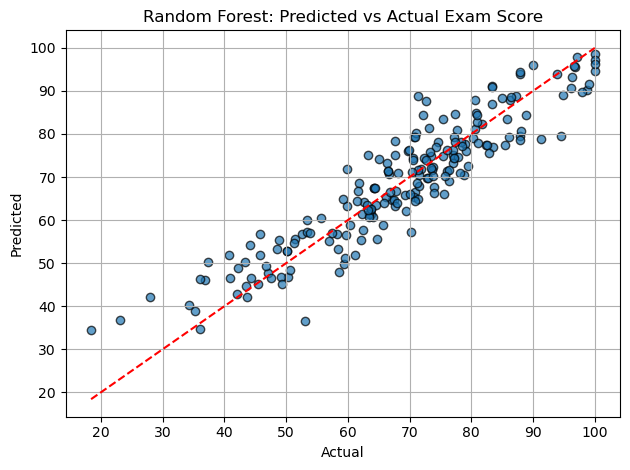

In [11]:
# Plot: Predicted vs Actual
plt.scatter(y_test, y_pred_best, alpha=0.7, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Predicted vs Actual Exam Score")
plt.grid(True)
plt.tight_layout()
plt.show()


[0.85254097 0.87284938 0.83024986]
[0.85688825 0.88828403 0.88598285 0.86130517 0.80441036]


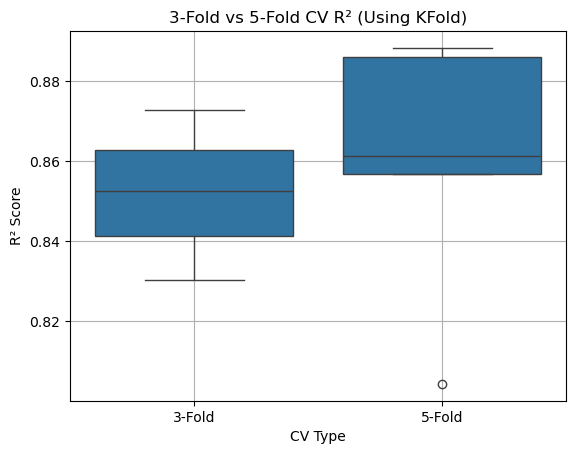

In [18]:

# K-Fold Cross-Validation using KFold
# This is for model evaluation, not tuning
#using the already-optimized model (best_rf) and checking its performance using 3-fold and 5-fold cross-validation.
kf3 = KFold(n_splits=3, shuffle=True, random_state=42)
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
cv3 = cross_val_score(best_rf, X_scaled, y, cv=kf3, scoring='r2')
cv5 = cross_val_score(best_rf, X_scaled, y, cv=kf5, scoring='r2')
print (cv3)
print (cv5)
cv_df = pd.DataFrame({"CV Type": ["3-Fold"]*3 + ["5-Fold"]*5,
                      "R² Score": np.concatenate([cv3, cv5])})
sns.boxplot(x="CV Type", y="R² Score", data=cv_df)
plt.title("3-Fold vs 5-Fold CV R² (Using KFold)")
plt.grid(True)
plt.show()


Drop-One-Feature R² Analysis (excluding baseline features):
-------------------------------------------------------------
Dropped 'social_media_hours': R² = 0.8280
Dropped 'netflix_hours': R² = 0.8458
Dropped 'attendance_percentage': R² = 0.8554
Dropped 'sleep_hours': R² = 0.8416
Dropped 'diet_quality_encoded': R² = 0.8549
Dropped 'exercise_frequency': R² = 0.8105


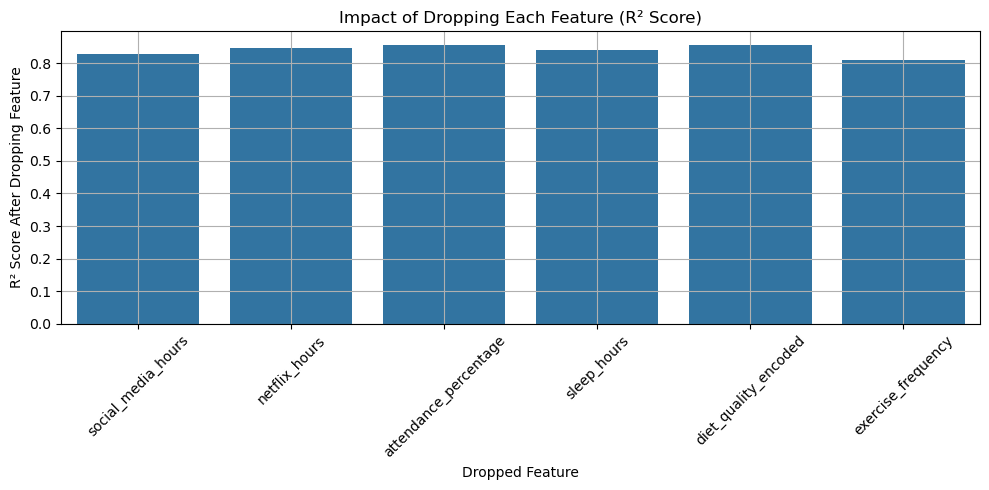

In [13]:
from collections import OrderedDict

# Dictionary to store R² scores after dropping each feature
drop_feature_scores = OrderedDict()

# Define baseline important features to keep
baseline_features = ['study_hours_per_day', 'mental_health_rating']

print("\nDrop-One-Feature R² Analysis (excluding baseline features):")
print("-------------------------------------------------------------")

# Loop over each feature
for feature in X.columns:
    if feature in baseline_features:
        continue  # Skip dropping key baseline features

    # Drop the feature and rescale the remaining features
    reduced_X = X.drop(columns=[feature])
    reduced_scaled = scaler.fit_transform(reduced_X)

    # Train/test split
    X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
        reduced_scaled, y, test_size=0.2, random_state=42
    )

    # Retrain model with best parameters
    model = RandomForestRegressor(**grid.best_params_, random_state=42)
    model.fit(X_train_d, y_train_d)

    # Predict and evaluate
    pred = model.predict(X_test_d)
    score = r2_score(y_test_d, pred)

    # Store result
    drop_feature_scores[feature] = score
    print(f"Dropped '{feature}': R² = {score:.4f}")

# visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(x=list(drop_feature_scores.keys()), y=list(drop_feature_scores.values()))
plt.title("Impact of Dropping Each Feature (R² Score)")
plt.ylabel("R² Score After Dropping Feature")
plt.xlabel("Dropped Feature")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##Results to Note: 

1. Model Performance 
Initial: R² Score: 0.8520946228738411
Initial MSE: 37.92724214999999
Initial MAE: 4.89393
Initial RMSE: 6.15850973450558
Initial MAPE: 8.218280855086581
Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score from cross validation: 0.8544396709085378

 Final Model Evaluation Metrics (Tuned RF)
R² Score: 0.8552
MSE: 37.14
MAE: 4.87
RMSE: 6.09
MAPE: 8.15%
- Best GridSearchCV Parameters:  'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200
- Best CV R^2 Score of 5 fold : 0.8544 
    - selcting best hyperparameters by estimating performance on unseen training folds before touching the test set.
- Final Test R^2 Score: 0.8552
    - true final evaluation on the test data 
- Final Test MSE: 37.14

2. Plot of Predicted vs Actual: Minor varience in low scores

3. Cross Validation BoxPlot: 5 Fold CV is higher then R^2 

4. Drop a Feature: 
- Exercise_frequency R^2 drops to 0.8105
- 2 features were retained

